# Contenido

1. Introducción
	* Conociendo los datos
	* Metodología
	* Reglas del juego (Sistema Marginalista)
2. Manipulación de datos
	* Carga
	* Limpieza
3. Análisis Exploratorio
	* Preparación de datos
	* Exploración y visualización

# Introducción

## Conociendo los datos


### Contenido general
Hasta 2020, 6,7 millones de personas residían en Victoria, el segundo estado más poblado de Australia. La mayoría de ellos, 5 millones, vivían o trabajaban en Melbourne, la capital del estado. Durante 2020, Australia fue uno de los primeros en cerrar las fronteras internacionales, seguido de un cierre de las fronteras interestatales. Victoria introdujo algunas de las restricciones relacionadas con la pandemia más estrictas en la actividad empresarial, lo que resultó en que una parte significativa de su población trabajara desde casa.

### Descripción
El conjunto de datos cubre 2016 días entre el 1 de enero de 2015 y el 6 de octubre de 2020. Durante algunos intervalos intradiarios, el RRP fue negativo, por lo que los productores de energía pagaban a los consumidores en lugar de lo contrario. A continuación se presenta una breve descripción de los datos:

-   fecha: datetime, la fecha de la grabación
-   demanda: float, la demanda total diaria de electricidad en MWh
-   RRP: float, el precio minorista recomendado en AUD$ / MWh
-   demanda_pos_RRP: float, la demanda total diaria con RRP positivo en MWh
-   RRP_positivo: float, un RRP promedio positivo, ponderado por la demanda intradiaria correspondiente en AUD$ / MWh
-   demanda_neg_RRP: float, la demanda total diaria con RRP negativo en MWh
-   RRP_negativo: float, un RRP promedio negativo, ponderado por la demanda intradiaria correspondiente en AUD$ / MWh
-   frac_at_neg_RRP: float, una fracción del día en la que la demanda se negoció a un RRP negativo
-   temperatura_min: float, la temperatura mínima durante el día en Celsius
-   temperatura_max: float, la temperatura máxima durante el día en Celsius
-   exposición_solar: float, energía total de la luz solar diaria en MJ/m^2
-   precipitación: float, lluvia diaria en mm
-   día_escolar: booleano, si los estudiantes estaban en la escuela ese día
-   feriado: booleano, si el día era un feriado estatal o nacional

## Metodología

**Análisis de la demanda:** Estudiar cómo los precios afectan la cantidad demandada, considerando la elasticidad precio de la demanda y otros comportamientos del consumidor.

**Evaluación de factores externos:** Analizar cómo el clima y las fechas sin escuela y vacaciones influyen en la demanda de productos.

**Aplicación del enfoque marginalista:** Evaluar cómo los cambios marginales en la oferta y la demanda, causados por estos factores, impactan los precios.

La metodología se alinea con el enfoque marginalista al considerar la interacción entre oferta y demanda.
Reconoce que los precios se ajustan en respuesta a cambios marginales en estos factores externos.
Destaca la importancia de comprender cómo estos factores influyen en la variación de precios en un mercado competitivo.

## Reglas de juego

El sistema marginalista es un enfoque económico que determina los precios en función de los costos marginales de producción y la demanda del mercado. En términos simples, significa que el precio de un bien o servicio se establece según el costo adicional de producir una unidad más de ese bien o servicio, y también por cuánto está dispuesto a pagar la gente por él.

Además de basarse en la oferta y la demanda, también incluye el concepto de casación. La casación se refiere al momento en el que la oferta y la demanda de un bien o servicio se equilibran, es decir, cuando la cantidad ofrecida es igual a la cantidad demandada. En este punto, se establece el precio de mercado.

Australia, como miembro de la OECD (Organización para la Cooperación y el Desarrollo Económicos), adopta el sistema marginalista en su mercado de energía porque se ajusta bien a la estructura de su mercado energético. En este sistema, los precios de la electricidad varían según la oferta y la demanda en tiempo real. Esto permite que los productores de energía respondan a cambios en la demanda y los costos de producción de manera eficiente. Además, fomenta la competencia y la eficiencia en el mercado energético al incentivar a los productores a generar electricidad de manera rentable y a los consumidores a utilizarla de manera más eficiente. En resumen, el sistema marginalista en el sector energético de Australia ayuda a garantizar una asignación eficiente de recursos y a mantener la estabilidad en el suministro de energía.


## Manipulación de datos

In [1]:
import calendar
import locale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings

In [2]:
# warnings
warnings.filterwarnings("ignore")
# language
locale.setlocale(locale.LC_TIME, "es_ES.UTF-8")
seasons_spanish = {
    "Winter": "Invierno",
    "Spring": "Primavera",
    "Summer": "Verano",
    "Autumn": "Otoño",
}
# dates
month_list = [calendar.month_abbr[i].capitalize() for i in range(1, 13)]
season_order = ["Spring", "Summer", "Autumn", "Winter"]
# plot style
pitayasmoothie = ['#18c0c4', '#f62196', '#A267F5', '#f3907e', '#ffe46b', '#fefeff']
pitayasmoothie_palette = sns.color_palette(pitayasmoothie)
plt.style.use(
    "https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle"
)


In [3]:
data = pd.read_csv("complete_dataset.csv", parse_dates=["date"])

In [4]:
data.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [5]:
data.tail()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
2101,2020-10-02,99585.835,-6.076028,41988.240,26.980251,57597.595,-30.173823,0.625000,12.8,26.0,22.0,0.0,N,N
2102,2020-10-03,92277.025,-1.983471,44133.510,32.438156,48143.515,-33.538025,0.583333,17.4,29.4,19.8,0.0,N,N
2103,2020-10-04,94081.565,25.008614,88580.995,26.571687,5500.570,-0.163066,0.062500,13.5,29.5,8.4,0.0,N,N
2104,2020-10-05,113610.030,36.764701,106587.375,39.616015,7022.655,-6.511550,0.083333,9.1,12.7,7.3,12.8,N,N
2105,2020-10-06,122607.560,75.771059,122607.560,75.771059,0.000,0.000000,0.000000,8.9,12.6,5.8,1.0,N,N


In [6]:
data.shape

(2106, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2106 non-null   datetime64[ns]
 1   demand           2106 non-null   float64       
 2   RRP              2106 non-null   float64       
 3   demand_pos_RRP   2106 non-null   float64       
 4   RRP_positive     2106 non-null   float64       
 5   demand_neg_RRP   2106 non-null   float64       
 6   RRP_negative     2106 non-null   float64       
 7   frac_at_neg_RRP  2106 non-null   float64       
 8   min_temperature  2106 non-null   float64       
 9   max_temperature  2106 non-null   float64       
 10  solar_exposure   2105 non-null   float64       
 11  rainfall         2103 non-null   float64       
 12  school_day       2106 non-null   object        
 13  holiday          2106 non-null   object        
dtypes: datetime64[ns](1), float64(11), objec

In [8]:
data.describe()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
count,2106,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2105.000000,2103.000000
mean,2017-11-18 12:00:00,120035.476503,76.079554,119252.305055,76.553847,783.171448,-2.686052,0.008547,11.582289,20.413200,14.743373,1.505944
min,2015-01-01 00:00:00,85094.375000,-6.076028,41988.240000,13.568986,0.000000,-342.220000,0.000000,0.600000,9.000000,0.700000,0.000000
25%,2016-06-10 06:00:00,109963.650000,38.707040,109246.250000,39.117361,0.000000,0.000000,0.000000,8.500000,15.525000,8.200000,0.000000
50%,2017-11-18 12:00:00,119585.912500,66.596738,119148.082500,66.869058,0.000000,0.000000,0.000000,11.300000,19.100000,12.700000,0.000000
75%,2019-04-28 18:00:00,130436.006250,95.075012,130119.477500,95.130181,0.000000,0.000000,0.000000,14.600000,23.900000,20.700000,0.800000
max,2020-10-06 00:00:00,170653.840000,4549.645105,170653.840000,4549.645105,57597.595000,0.000000,0.625000,28.000000,43.500000,33.300000,54.600000
std,NaN,13747.993761,130.246805,14818.631319,130.114184,3578.920686,19.485432,0.039963,4.313711,6.288693,7.945527,4.307897


In [9]:
data.isna().sum()

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
df = data.copy()

In [12]:
data["date"] = pd.to_datetime(df["date"])

In [13]:
df.rainfall.fillna(df.rainfall.median(), inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2106 non-null   datetime64[ns]
 1   demand           2106 non-null   float64       
 2   RRP              2106 non-null   float64       
 3   demand_pos_RRP   2106 non-null   float64       
 4   RRP_positive     2106 non-null   float64       
 5   demand_neg_RRP   2106 non-null   float64       
 6   RRP_negative     2106 non-null   float64       
 7   frac_at_neg_RRP  2106 non-null   float64       
 8   min_temperature  2106 non-null   float64       
 9   max_temperature  2106 non-null   float64       
 10  solar_exposure   2105 non-null   float64       
 11  rainfall         2106 non-null   float64       
 12  school_day       2106 non-null   object        
 13  holiday          2106 non-null   object        
dtypes: datetime64[ns](1), float64(11), objec

In [15]:
df.isna().sum()

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           0
school_day         0
holiday            0
dtype: int64

## Analisis Exploratorio

### Preparación de datos

In [16]:
# To extract the year
df["Year"] = df["date"].dt.year
# To extract the month
df["Month"] = df["date"].dt.month
# To extract the day
df["Day"] = df["date"].dt.day

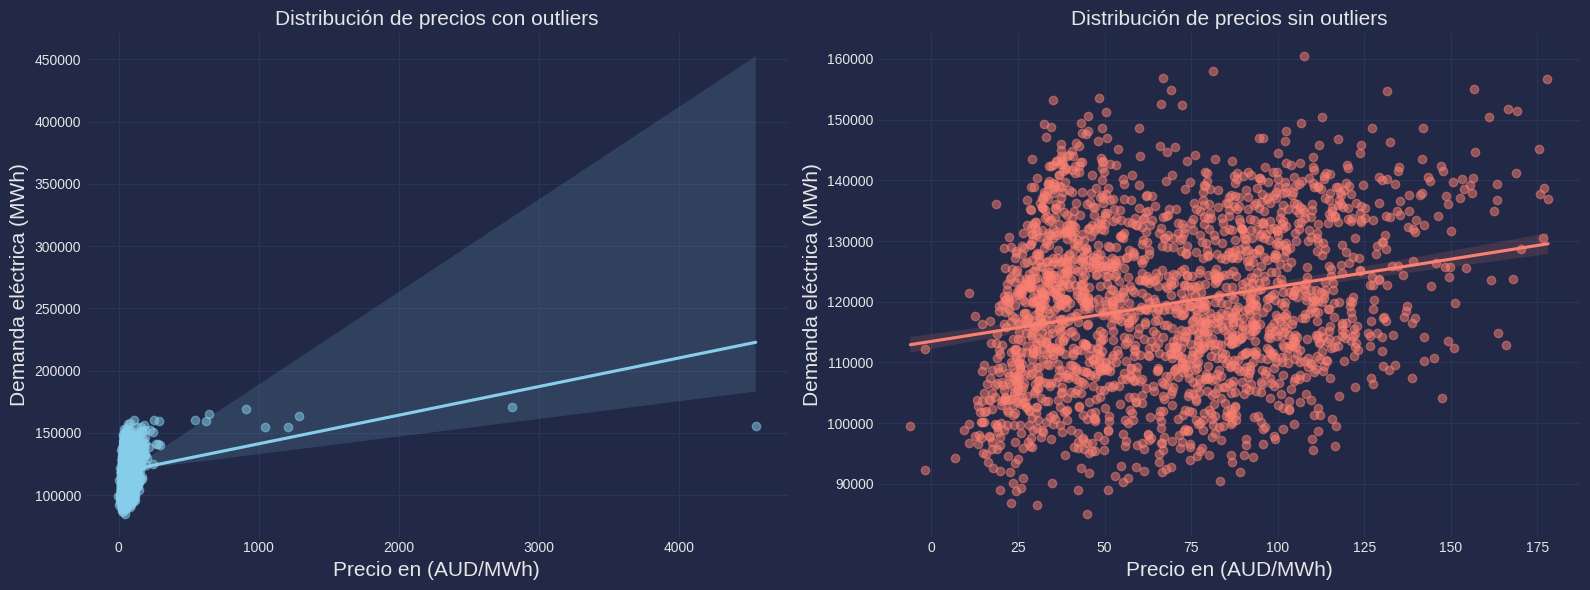

In [17]:
plt.figure(figsize=(16, 6))

# Gráfico con outliers
plt.subplot(1, 2, 1)
sns.regplot(data=df, x='RRP', y='demand', color="skyblue", scatter_kws={"alpha":0.5})
plt.title('Distribución de precios con outliers', fontsize=15)
plt.xlabel("Precio en (AUD/MWh)", fontsize=15)
plt.ylabel("Demanda eléctrica (MWh)", fontsize=15)

# Eliminación de outliers
Q1 = df['RRP'].quantile(0.25)
Q3 = df['RRP'].quantile(0.75)
IQR = Q3 - Q1 
df_no_outliers = df[(df['RRP'] > (Q1 - 1.5 * IQR)) & (df['RRP'] < (Q3 + 1.5 * IQR))]

# Gráfico sin outliers
plt.subplot(1, 2, 2)
sns.regplot(data=df_no_outliers, x='RRP', y='demand', color="salmon", scatter_kws={"alpha":0.5})
plt.title('Distribución de precios sin outliers', fontsize=15)
plt.xlabel("Precio en (AUD/MWh)", fontsize=15)
plt.ylabel("Demanda eléctrica (MWh)", fontsize=15)

plt.tight_layout()
plt.show()

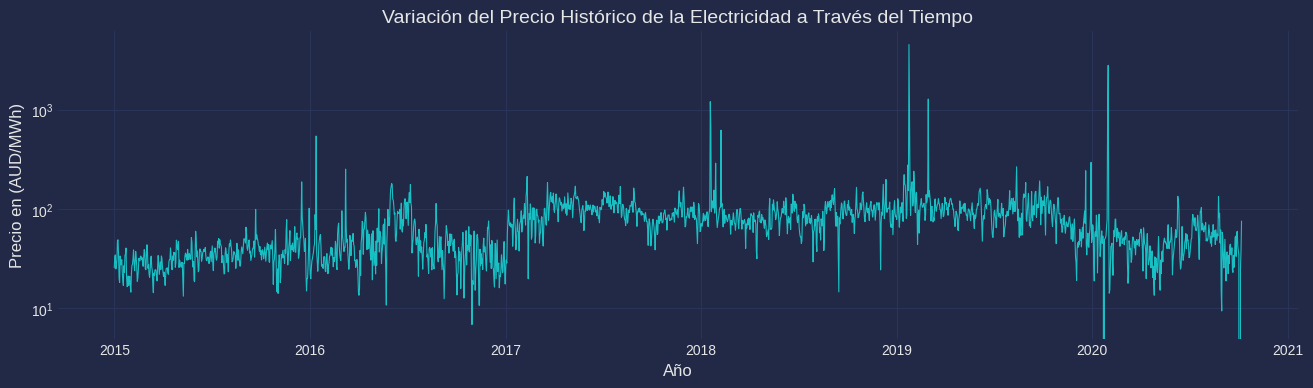

In [40]:
plt.figure(figsize=(16, 4))
plt.plot(df["date"], df["RRP"], lw=0.8)
plt.title(
    "Variación del Precio Histórico de la Electricidad a Través del Tiempo", fontsize=14
)
plt.ylabel("Precio en (AUD/MWh)", fontsize=12)
plt.xlabel("Año", fontsize=12)
plt.yscale("log")
plt.show()

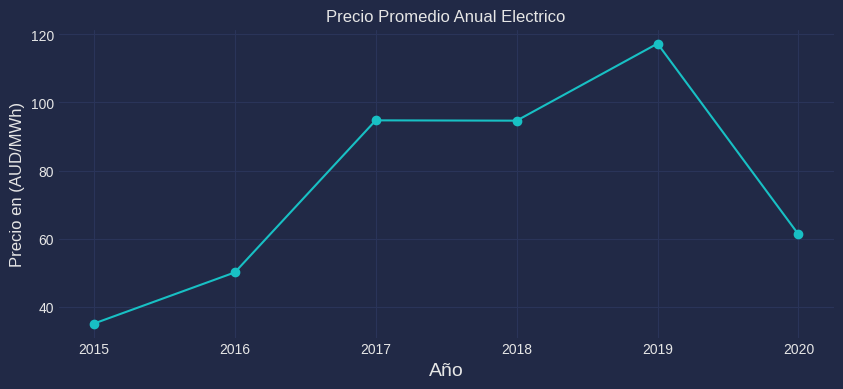

In [19]:
avg_year_price = df.groupby("Year")["RRP"].mean().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(avg_year_price["Year"], avg_year_price["RRP"], marker="o")
plt.title("Precio Promedio Anual Electrico", fontsize=12)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Precio en (AUD/MWh)", fontsize=12)

plt.show()

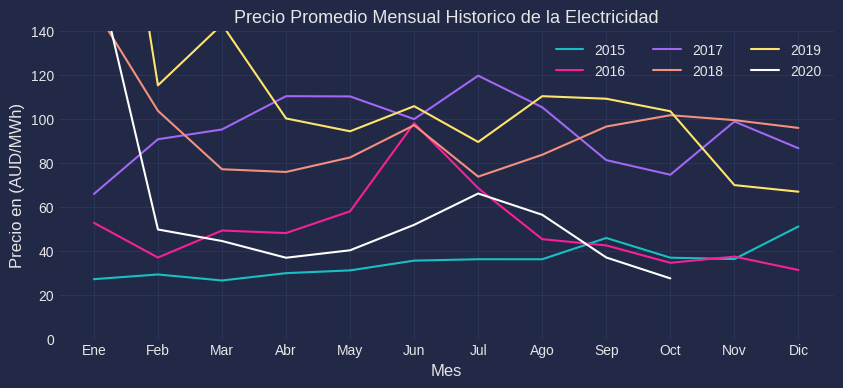

In [20]:
avg_month_price = df.groupby(["Month", "Year"])["RRP"].mean().reset_index()

plt.figure(figsize=(10, 4))

for i, year in enumerate(avg_month_price["Year"].unique()):
    year_data = avg_month_price[avg_month_price["Year"] == year]
    plt.plot(year_data["Month"], year_data["RRP"], label=year)

plt.xticks(range(1, 13), month_list)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Precio en (AUD/MWh)", fontsize=12)
plt.ylim(0, 140)
plt.title("Precio Promedio Mensual Historico de la Electricidad", fontsize=13)
plt.legend(ncol=3)

plt.show()

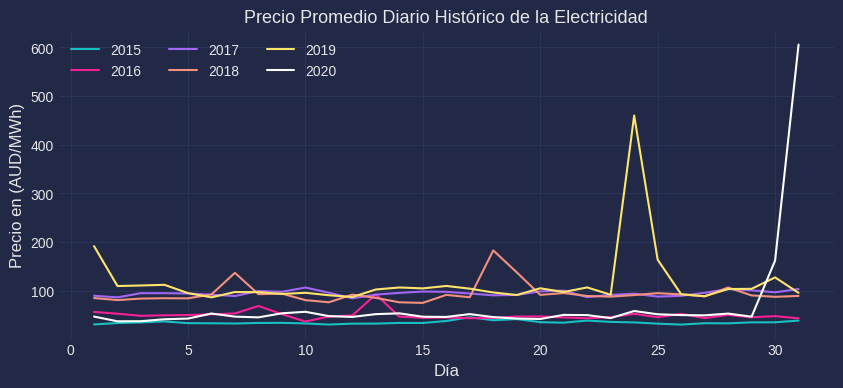

In [21]:
avg_day_price = df.groupby(["Day", "Year"])["RRP"].mean().reset_index()

plt.figure(figsize=(10, 4))

for i, year in enumerate(avg_day_price["Year"].unique()):
    year_data = avg_day_price[avg_day_price["Year"] == year]
    plt.plot(year_data["Day"], year_data["RRP"], label=year)

plt.xlabel("Día", fontsize=12)
plt.ylabel("Precio en (AUD/MWh)", fontsize=12)
plt.title("Precio Promedio Diario Histórico de la Electricidad", fontsize=13)
plt.legend(ncol=3, loc="upper left")

plt.show()

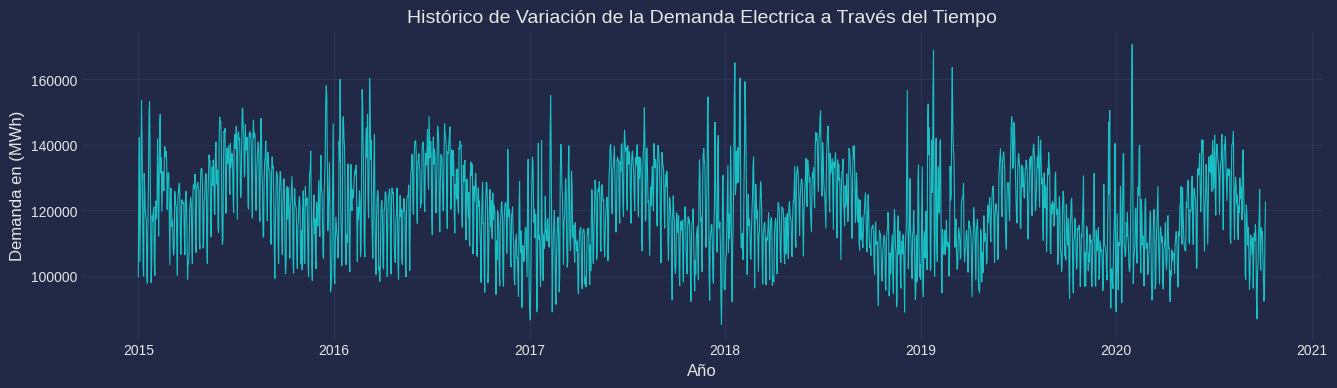

In [22]:
plt.figure(figsize=(16, 4))
plt.plot(df["date"], df["demand"], lw=0.8)
plt.title(
    "Histórico de Variación de la Demanda Electrica a Través del Tiempo", fontsize=14
)
plt.ylabel("Demanda en (MWh)", fontsize=12)
plt.xlabel("Año", fontsize=12)
plt.show()

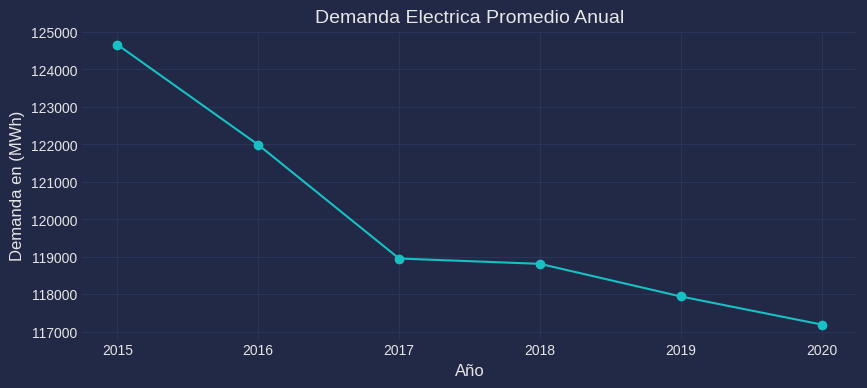

In [23]:
avg_year_demand = df.groupby("Year")["demand"].mean().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(avg_year_demand["Year"], avg_year_demand["demand"], marker="o")
plt.title("Demanda Electrica Promedio Anual", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Demanda en (MWh)", fontsize=12)

plt.show()

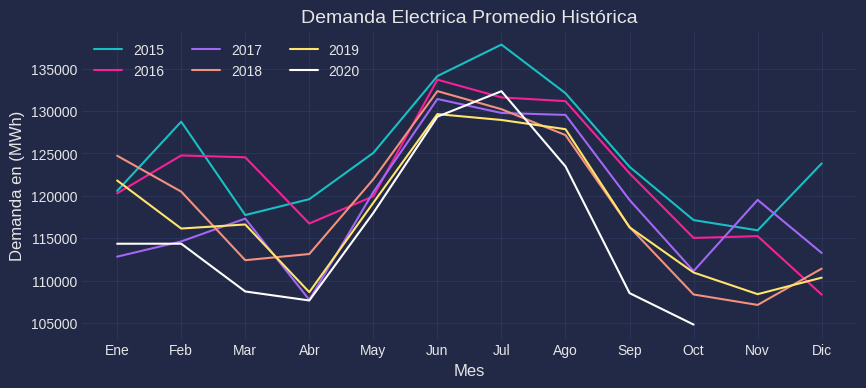

In [24]:
avg_month_demand = df.groupby(["Month", "Year"])["demand"].mean().reset_index()

plt.figure(figsize=(10, 4))

for i, year in enumerate(avg_month_demand["Year"].unique()):
    year_data = avg_month_demand[avg_month_demand["Year"] == year]
    plt.plot(year_data["Month"], year_data["demand"], label=year)

plt.xticks(range(1, 13), month_list)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Demanda en (MWh)", fontsize=12)
plt.title("Demanda Electrica Promedio Histórica", fontsize=14)
plt.legend(ncol=3, loc="upper left")

plt.show()

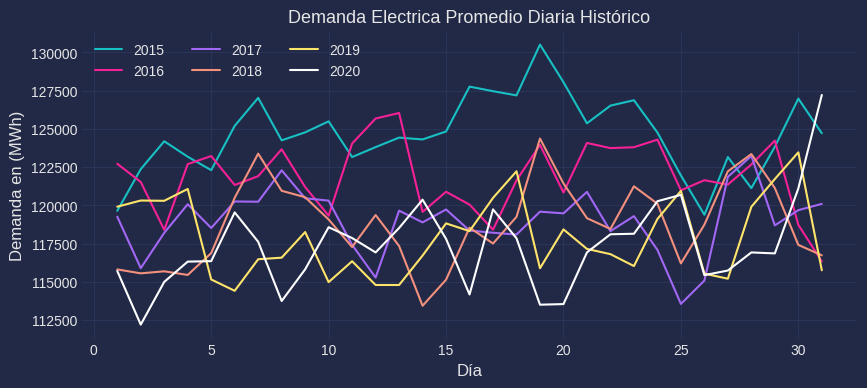

In [25]:
avg_day_demand = df.groupby(["Day", "Year"])["demand"].mean().reset_index()

plt.figure(figsize=(10, 4))

for i, year in enumerate(avg_day_demand["Year"].unique()):
    year_data = avg_day_demand[avg_day_demand["Year"] == year]
    plt.plot(year_data["Day"], year_data["demand"], label=year)

plt.xlabel("Día", fontsize=12)
plt.ylabel("Demanda en (MWh)", fontsize=12)
plt.title("Demanda Electrica Promedio Diaria Histórico", fontsize=13)
plt.legend(ncol=3, loc="upper left")

plt.show()

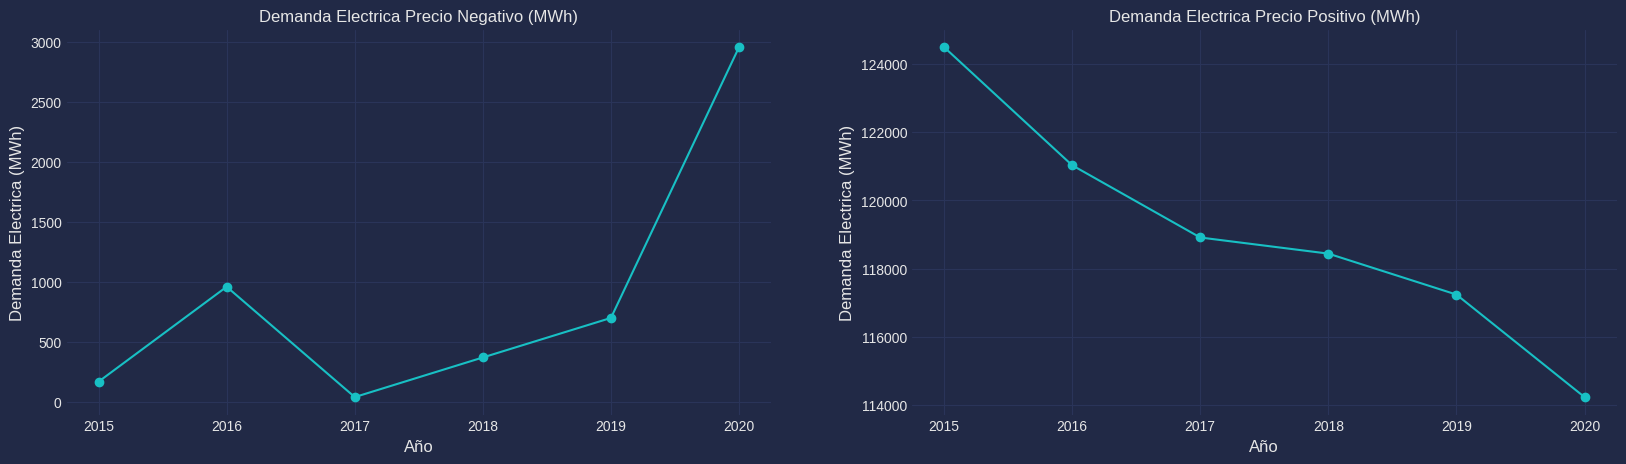

In [26]:
avg_demand_neg = df.groupby("Year")["demand_neg_RRP"].mean()
avg_demand_pos = df.groupby("Year")["demand_pos_RRP"].mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].plot(avg_demand_neg.index, avg_demand_neg.values, marker="o")
axs[0].set_ylabel("Demanda Electrica (MWh)", fontsize=12)
axs[0].set_title("Demanda Electrica Precio Negativo (MWh)", fontsize=12)
axs[0].set_xlabel("Año", fontsize=12)

axs[1].plot(avg_demand_pos.index, avg_demand_pos.values, marker="o")
axs[1].set_ylabel("Demanda Electrica (MWh)", fontsize=12)
axs[1].set_title("Demanda Electrica Precio Positivo (MWh)", fontsize=12)
axs[1].set_xlabel("Año", fontsize=12)

plt.show()

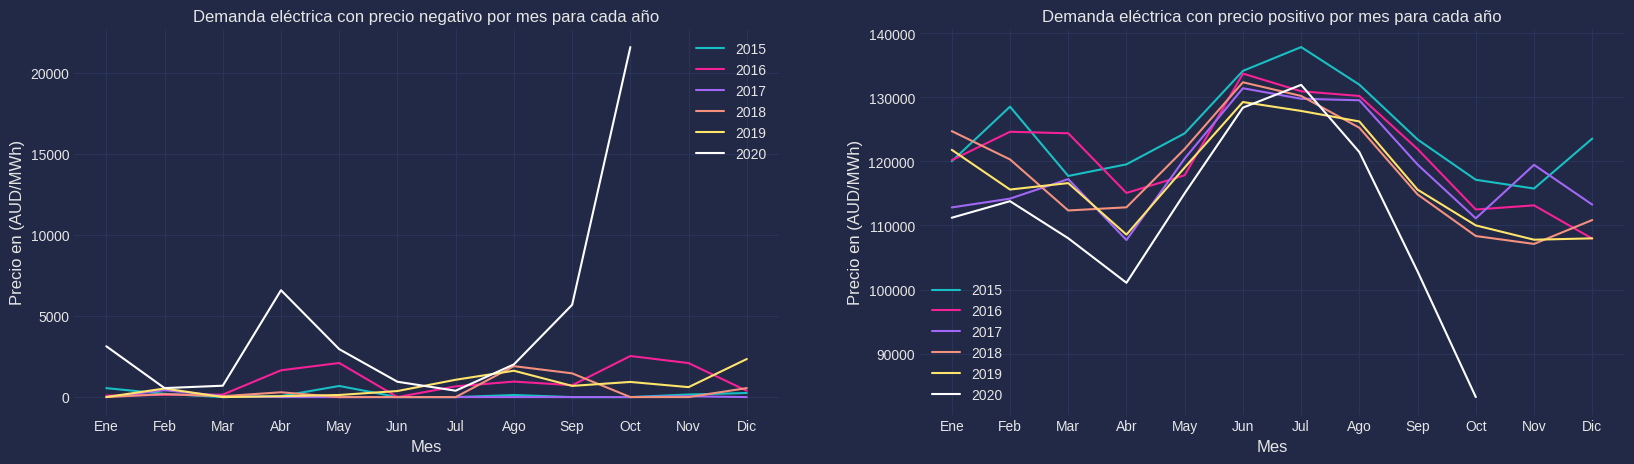

In [27]:
# Agrupar por meses y calcular el promedio de la demanda con RRP negativo y positivo
avg_demand_neg_monthly = (
    df.groupby(["Month", "Year"])["demand_neg_RRP"].mean().reset_index()
)
avg_demand_pos_monthly = (
    df.groupby(["Month", "Year"])["demand_pos_RRP"].mean().reset_index()
)

# Crear la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Primer subplot para la demanda con RRP negativo por mes
axs[0].set_xticks(range(1, 13))
axs[0].set_xticklabels(month_list)
for year in df["Year"].unique():
    year_data = avg_demand_neg_monthly[avg_demand_neg_monthly["Year"] == year]
    axs[0].plot(year_data["Month"], year_data["demand_neg_RRP"], label=year)
axs[0].set_title(
    "Demanda eléctrica con precio negativo por mes para cada año", fontsize=12
)
axs[0].set_ylabel("Precio en (AUD/MWh)", fontsize=12)
axs[0].set_xlabel("Mes", fontsize=12)
axs[0].legend()

# Segundo subplot para la demanda con RRP positivo por mes
axs[1].set_xticks(range(1, 13))
axs[1].set_xticklabels(month_list)
for year in df["Year"].unique():
    year_data = avg_demand_pos_monthly[avg_demand_pos_monthly["Year"] == year]
    axs[1].plot(year_data["Month"], year_data["demand_pos_RRP"], label=year)
axs[1].set_title(
    "Demanda eléctrica con precio positivo por mes para cada año", fontsize=12
)
axs[1].set_ylabel("Precio en (AUD/MWh)", fontsize=12)
axs[1].set_xlabel("Mes", fontsize=12)
axs[1].legend()

Text(0.5, 0, 'Temperatura máxima (°C)')

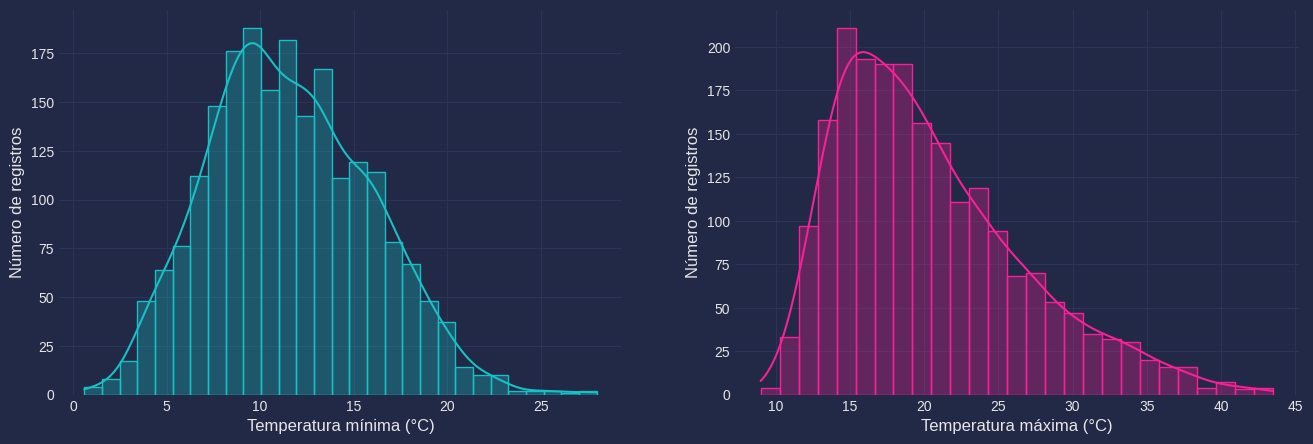

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(df["min_temperature"], ax=ax1, kde=True, edgecolor="#18c0c4", alpha=0.3)
ax1.set_ylabel("Número de registros", fontsize=12)
ax1.set_xlabel("Temperatura mínima (°C)", fontsize=12)
sns.histplot(
    df["max_temperature"],
    ax=ax2,
    kde=True,
    color="#f62196",
    edgecolor="#f62196",
    alpha=0.3,
)
ax2.set_ylabel("Número de registros", fontsize=12)
ax2.set_xlabel("Temperatura máxima (°C)", fontsize=12)

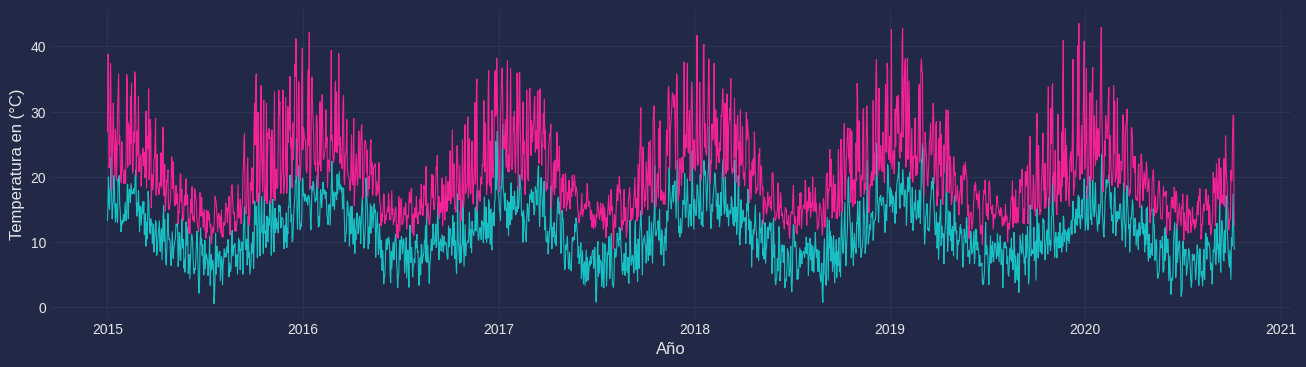

In [29]:
plt.figure(figsize=(16, 4))
plt.plot(df["date"], df[["min_temperature", "max_temperature"]], lw=0.8)
plt.ylabel("Temperatura en (°C)", fontsize=12)
plt.xlabel("Año", fontsize=12)
plt.show()

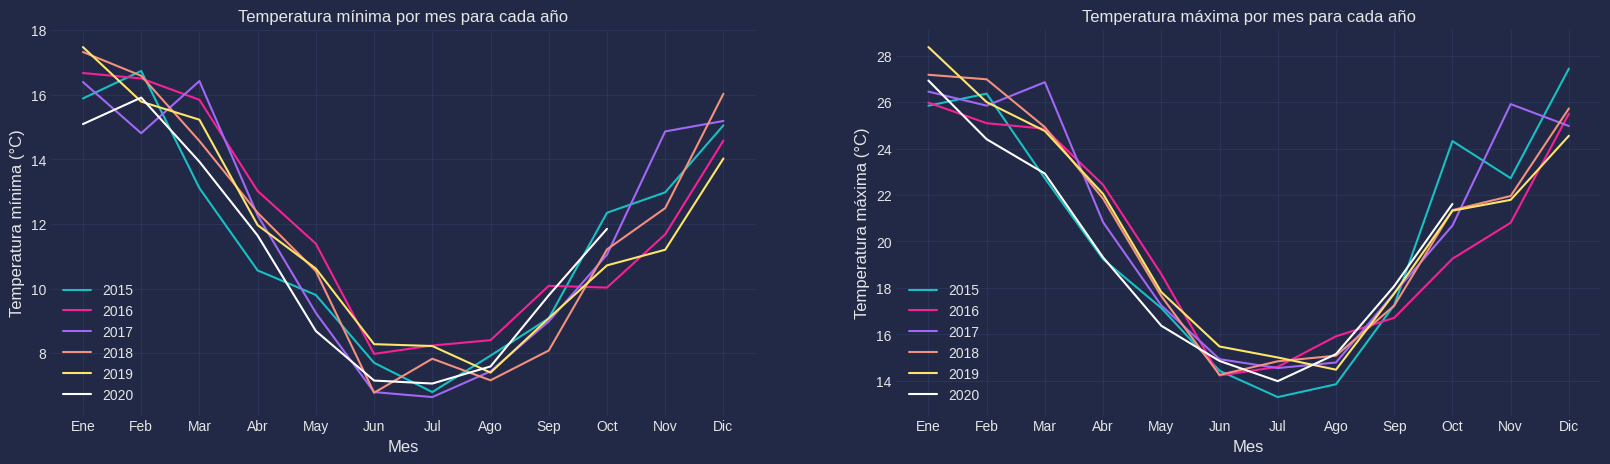

In [30]:
# Agrupar por meses y años y calcular el promedio de la temperatura mínima y máxima
average_min_temp_monthly = (
    df.groupby(["Month", "Year"])["min_temperature"].mean().reset_index()
)
average_max_temp_monthly = (
    df.groupby(["Month", "Year"])["max_temperature"].mean().reset_index()
)

# Crear la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Primer subplot para la temperatura mínima por mes y año
axs[0].set_xticks(range(1, 13))
axs[0].set_xticklabels(month_list)
for year in df["Year"].unique():
    year_data = average_min_temp_monthly[average_min_temp_monthly["Year"] == year]
    axs[0].plot(year_data["Month"], year_data["min_temperature"], label=year)
axs[0].set_title("Temperatura mínima por mes para cada año", fontsize=12)
axs[0].set_ylabel("Temperatura mínima (°C)", fontsize=12)
axs[0].set_xlabel("Mes", fontsize=12)
axs[0].legend()

# Segundo subplot para la temperatura máxima por mes y año
axs[1].set_xticks(range(1, 13))
axs[1].set_xticklabels(month_list)
for year in df["Year"].unique():
    year_data = average_max_temp_monthly[average_max_temp_monthly["Year"] == year]
    axs[1].plot(year_data["Month"], year_data["max_temperature"], label=year)
axs[1].set_title("Temperatura máxima por mes para cada año", fontsize=12)
axs[1].set_ylabel("Temperatura máxima (°C)", fontsize=12)
axs[1].set_xlabel("Mes", fontsize=12)
axs[1].legend()

plt.show()

In [31]:
def season(month):
    season_month = {
        12: "Summer",
        1: "Summer",
        2: "Summer",
        3: "Autumn",
        4: "Autumn",
        5: "Autumn",
        6: "Winter",
        7: "Winter",
        8: "Winter",
        9: "Spring",
        10: "Spring",
        11: "Spring",
    }
    return season_month.get(month)


season_list = []
for month in df["Month"]:
    seasons = season(month)
    season_list.append(seasons)

df["Season"] = season_list

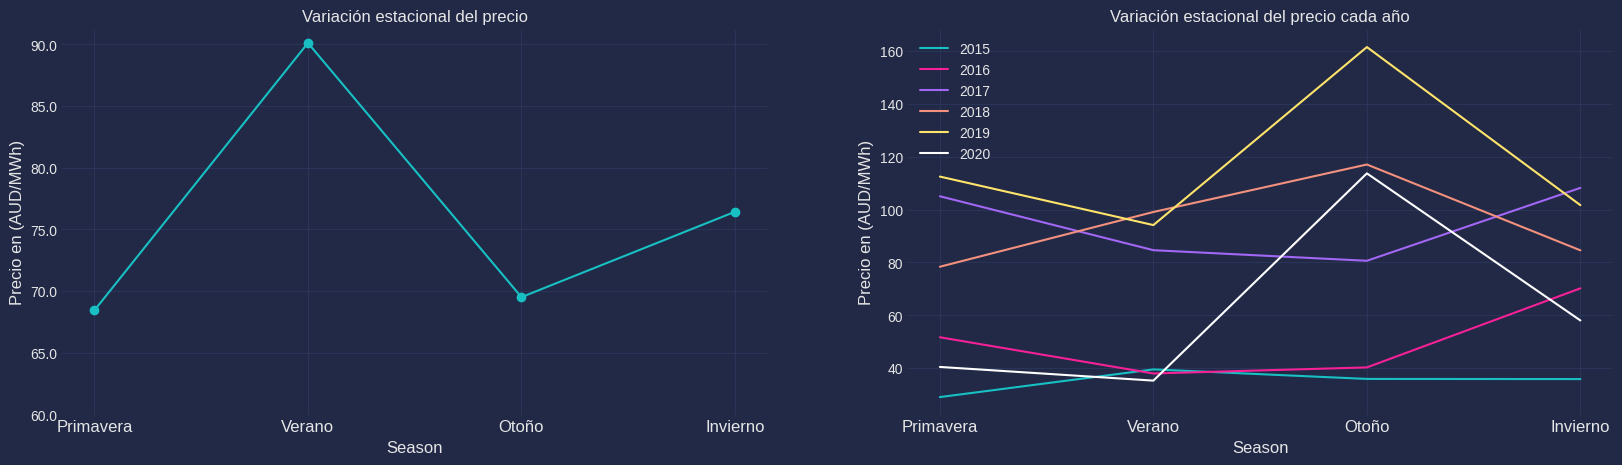

In [32]:
# Agrupar por temporadas y calcular el promedio del precio
avg_season_rrp = (
    df.groupby(["Season"])["RRP"].mean().reindex(season_order).reset_index()
)
avg_season_year_rrp = df.groupby(["Season", "Year"])["RRP"].mean().reset_index()

# Crear la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Primer subplot para la variación estacional del precio
axs[0].plot(avg_season_rrp["Season"], avg_season_rrp["RRP"], marker="o")
axs[0].set_ylabel("Precio en (AUD/MWh)", fontsize=12)
axs[0].set_xlabel("Season", fontsize=12)
axs[0].set_title("Variación estacional del precio", fontsize=12)
axs[0].set_ylim(60, None)  # Empieza en 60
axs[0].yaxis.set_major_formatter(
    ticker.StrMethodFormatter("{x:.1f}")
)  # Decimales en el eje y

# Cambiar las etiquetas de las temporadas a español
axs[0].set_xticklabels(
    [seasons_spanish[season] for season in avg_season_rrp["Season"]], fontsize=12
)

# Segundo subplot para la variación estacional del precio por año
for i, year in enumerate(df["Year"].unique()):
    year_data = avg_season_year_rrp[avg_season_year_rrp["Year"] == year]
    axs[1].plot(range(len(avg_season_rrp["Season"])), year_data["RRP"], label=year) # Modificado aquí
axs[1].set_xlabel("Season", fontsize=12)
axs[1].set_ylabel("Precio en (AUD/MWh)", fontsize=12)
axs[1].set_title("Variación estacional del precio cada año", fontsize=12)
axs[1].legend()
# Cambiar las etiquetas de las temporadas a español
axs[1].set_xticks(range(len(avg_season_rrp["Season"]))) # Modificado aquí
axs[1].set_xticklabels(
    [seasons_spanish[season] for season in avg_season_rrp["Season"]], fontsize=12
)

plt.show()

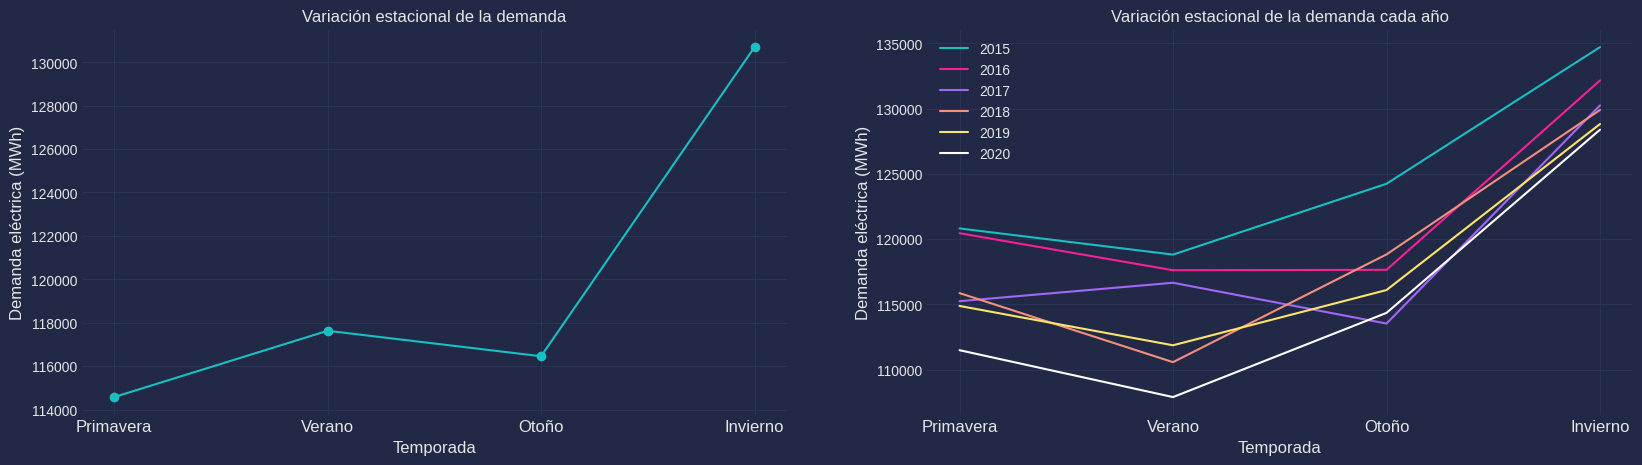

In [33]:
avg_season_demand = (
    df.groupby(["Season"])["demand"].mean().reindex(season_order).reset_index()
)
avg_season_year_demand = df.groupby(["Season", "Year"])["demand"].mean().reset_index()

# Crear la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Primer subplot para la variación estacional de la demanda
axs[0].plot(avg_season_demand["Season"], avg_season_demand["demand"], marker="o")
axs[0].set_ylabel("Demanda eléctrica (MWh)", fontsize=12)
axs[0].set_xlabel("Temporada", fontsize=12)
axs[0].set_title("Variación estacional de la demanda", fontsize=12)

# Cambiar las etiquetas de las temporadas a español
axs[0].set_xticklabels(
    [seasons_spanish[season] for season in avg_season_rrp["Season"]], fontsize=12
)

for i, year in enumerate(df["Year"].unique()):
    year_data = avg_season_year_demand[avg_season_year_demand["Year"] == year]
    axs[1].plot(range(len(avg_season_demand["Season"])), year_data["demand"], label=year) # Modificado aquí
axs[1].set_xlabel("Temporada", fontsize=12)
axs[1].set_ylabel("Demanda eléctrica (MWh)", fontsize=12)
axs[1].set_title("Variación estacional de la demanda cada año", fontsize=12)
axs[1].legend()

# Cambiar las etiquetas de las temporadas a español
axs[1].set_xticks(range(len(avg_season_demand["Season"]))) # Modificado aquí
axs[1].set_xticklabels(
    [seasons_spanish[season] for season in avg_season_demand["Season"]], fontsize=12
)

plt.show()

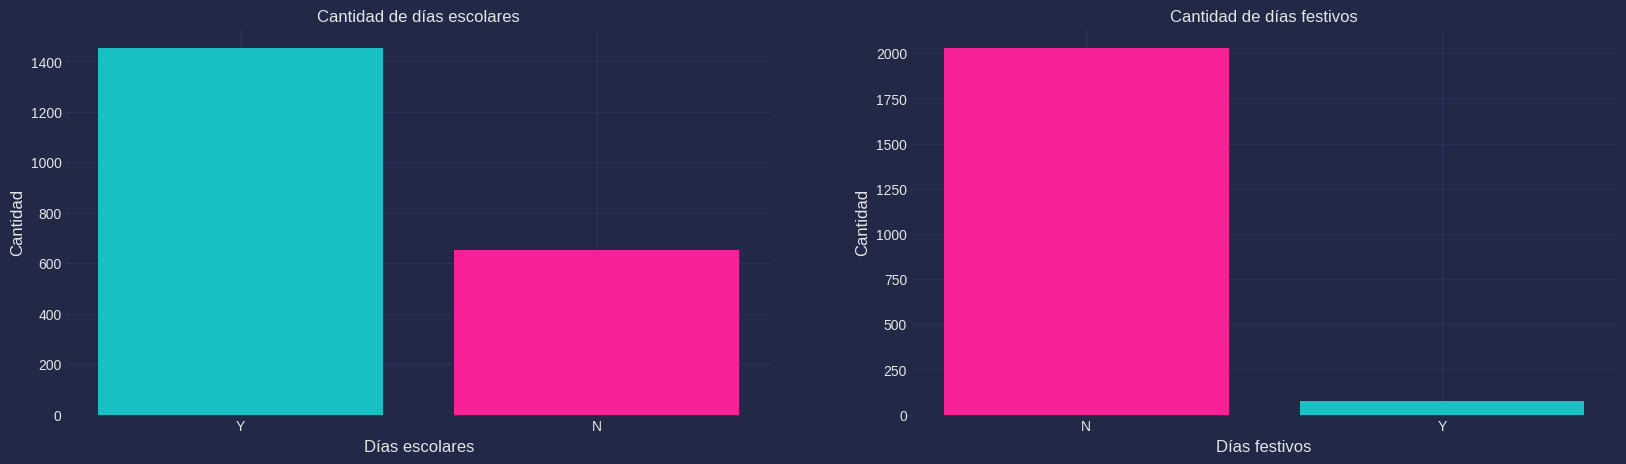

In [34]:
# Crear la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Primer subplot para los días escolares
axs[0].bar(df['school_day'].value_counts().index, df['school_day'].value_counts().values, color=["#18c0c4", "#f62196"])
axs[0].set_title('Cantidad de días escolares', fontsize=12)
axs[0].set_xlabel('Días escolares', fontsize=12)
axs[0].set_ylabel('Cantidad', fontsize=12)

# Segundo subplot para los días festivos
axs[1].bar(df['holiday'].value_counts().index, df['holiday'].value_counts().values, color=["#f62196", "#18c0c4"])
axs[1].set_title('Cantidad de días festivos', fontsize=12)
axs[1].set_xlabel('Días festivos', fontsize=12)
axs[1].set_ylabel('Cantidad', fontsize=12)

plt.show()

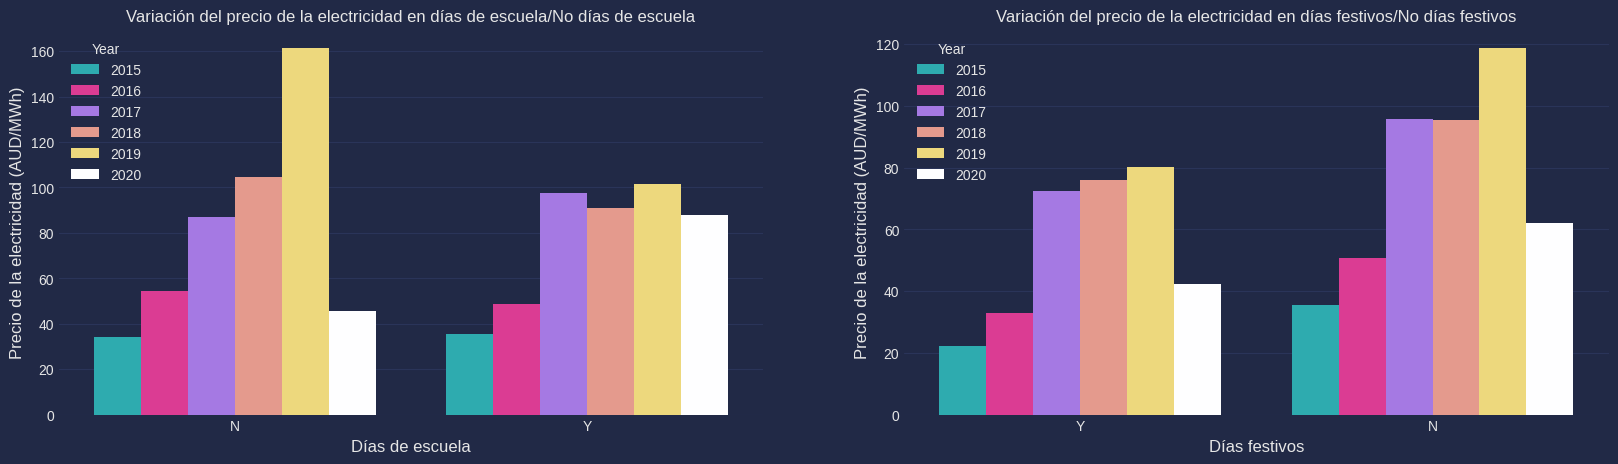

In [35]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g1=sns.barplot(data=df, x='school_day', y='RRP', hue='Year', ci=False, palette=pitayasmoothie_palette)
g1.set_title('Variación del precio de la electricidad en días de escuela/No días de escuela', fontsize=12)
g1.set_xlabel('Días de escuela', fontsize=12)
g1.set_ylabel('Precio de la electricidad (AUD/MWh)', fontsize=12)

plt.subplot(1,2,2)
g2=sns.barplot(data=df, x='holiday', y='RRP', hue='Year', ci=False, palette=pitayasmoothie_palette)
g2.set_title('Variación del precio de la electricidad en días festivos/No días festivos', fontsize=12)
g2.set_xlabel('Días festivos', fontsize=12)
g2.set_ylabel('Precio de la electricidad (AUD/MWh)', fontsize=12)
plt.show()

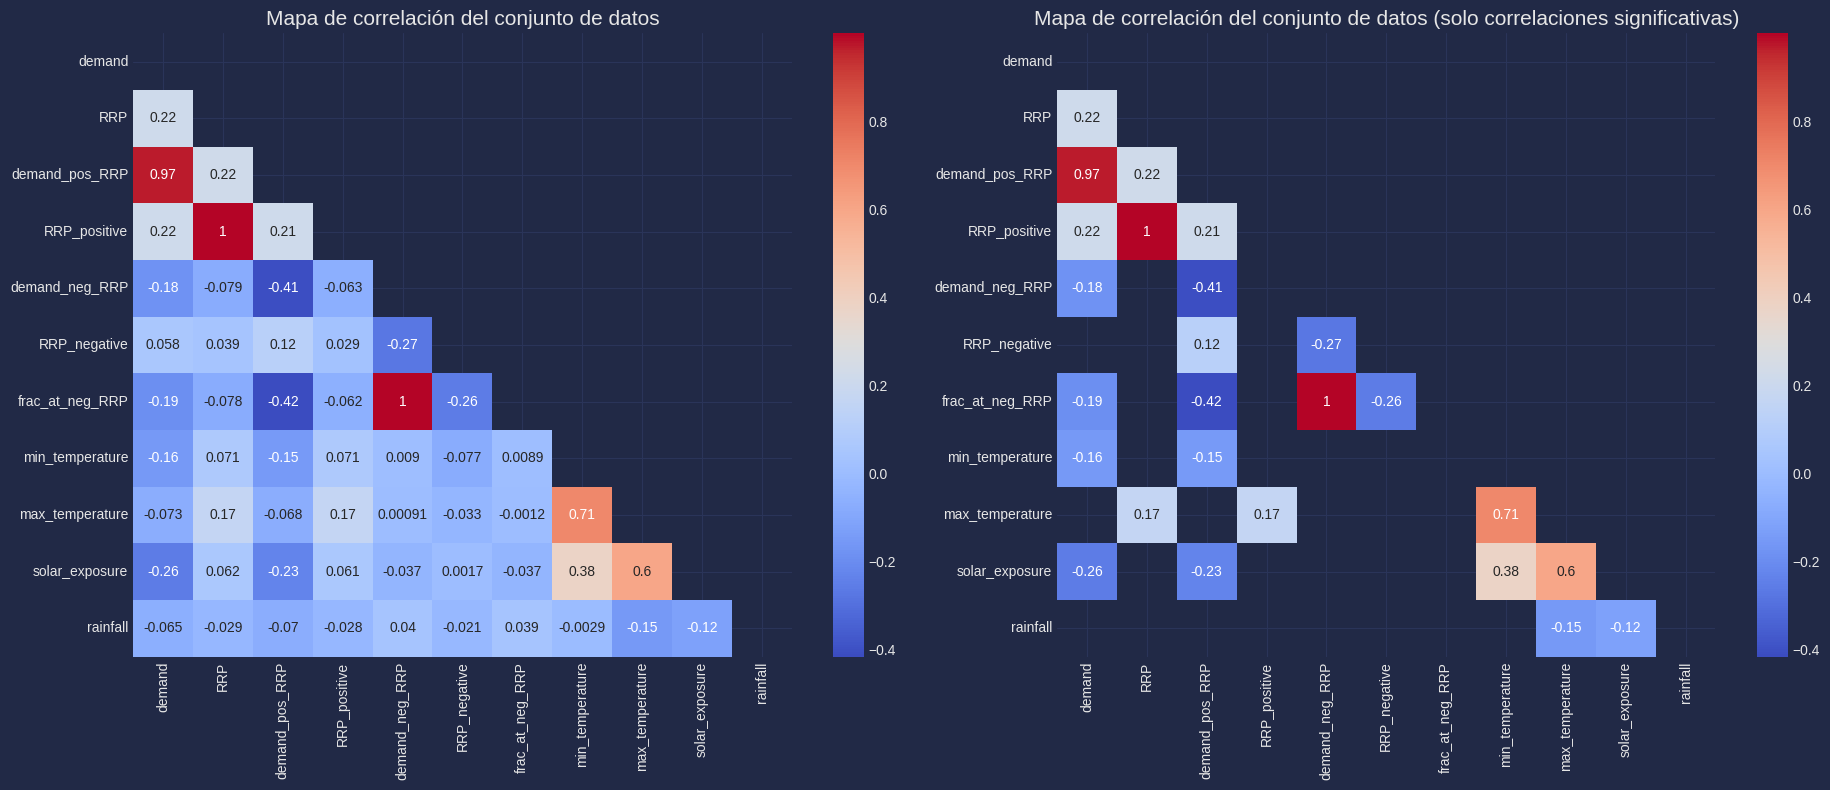

In [36]:
# Correlación completa
corr = df[[col for col in df.columns if df[col].dtypes == np.float64]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Umbral para las correlaciones significativas
threshold = 0.1
significant_corr = corr[(corr.abs() > threshold) & (corr.abs() < 1)]

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(19, 8))

# Heatmap de la correlación completa
sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", ax=axs[0])
axs[0].set_title('Mapa de correlación del conjunto de datos', fontsize=15)

# Heatmap de las correlaciones significativas
sns.heatmap(significant_corr, mask=mask, annot=True, cmap="coolwarm", ax=axs[1])
axs[1].set_title('Mapa de correlación del conjunto de datos (solo correlaciones significativas)', fontsize=15)

plt.tight_layout()
plt.show()


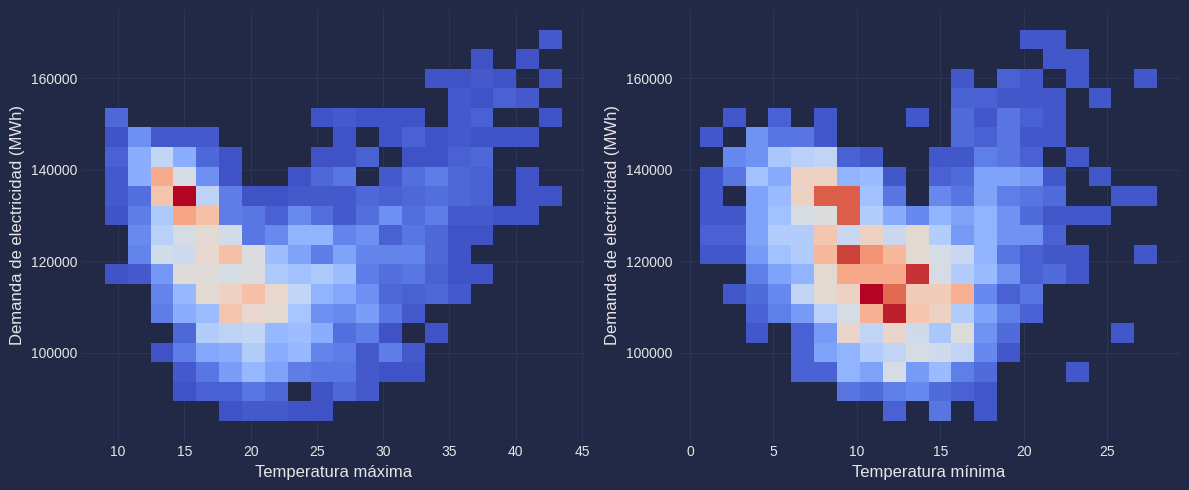

In [37]:
# Crear una figura y ejes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Correlación entre demanda y temperatura máxima
sns.histplot(df, x='max_temperature', y='demand', bins=20, cmap='coolwarm', ax=axes[0])
axes[0].set_xlabel('Temperatura máxima', fontsize=12)
axes[0].set_ylabel('Demanda de electricidad (MWh)', fontsize=12)

# Correlación entre demanda y temperatura mínima
sns.histplot(df, x='min_temperature', y='demand', bins=20, cmap='coolwarm', ax=axes[1])
axes[1].set_xlabel('Temperatura mínima', fontsize=12)
axes[1].set_ylabel('Demanda de electricidad (MWh)', fontsize=12)

plt.tight_layout()  # Ajustar automáticamente la disposición de los ejes para evitar solapamientos

plt.show()

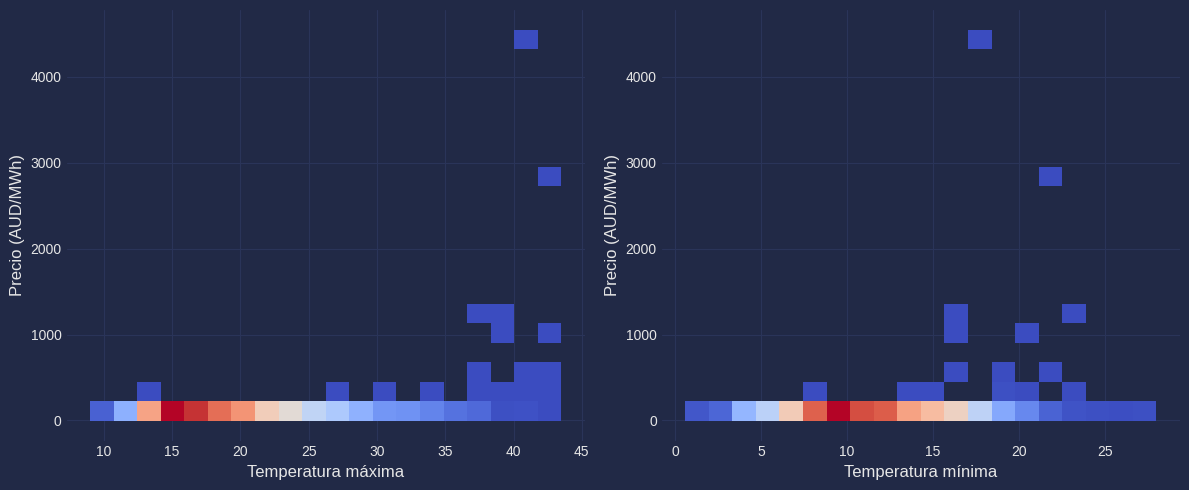

In [42]:
# Crear una figura y ejes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Correlación entre demanda y temperatura máxima
sns.histplot(df, x='max_temperature', y='RRP', bins=20, cmap='coolwarm', ax=axes[0])
axes[0].set_xlabel('Temperatura máxima', fontsize=12)
axes[0].set_ylabel('Precio (AUD/MWh)', fontsize=12)

# Correlación entre demanda y temperatura mínima
sns.histplot(df, x='min_temperature', y='RRP', bins=20, cmap='coolwarm', ax=axes[1])
axes[1].set_xlabel('Temperatura mínima', fontsize=12)
axes[1].set_ylabel('Precio (AUD/MWh)', fontsize=12)

plt.tight_layout()  # Ajustar automáticamente la disposición de los ejes para evitar solapamientos
plt.show()